In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import re
import random

['output_1.txt', 'output_10.txt', 'output_20.txt', 'output_30.txt', 'output_40.txt', 'output_50.txt']
[32882.007222 32882.007222 32882.007222 32882.007222 32882.007222
 32882.007222]


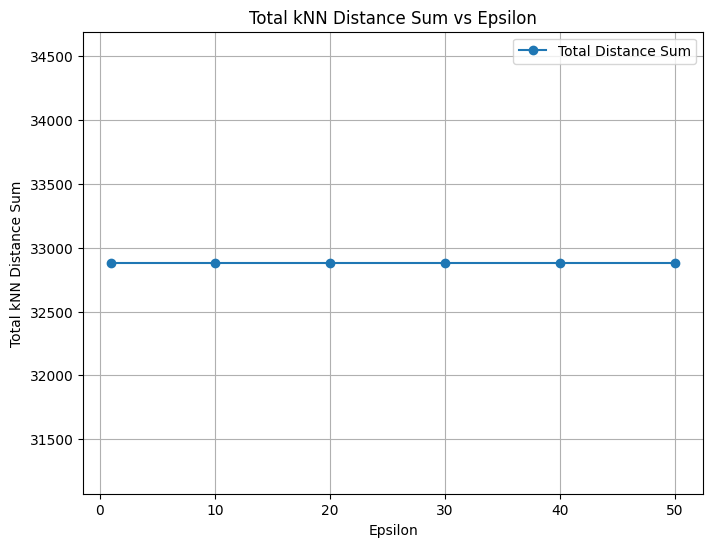

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

# 파일 로드
file_paths = sorted(glob.glob("output_*.txt"))  # 파일명 기준 정렬
epsilon_values = []
distance_sums = []
print(file_paths)
# 파일별로 데이터 읽고 처리
for file_path in file_paths:
    with open(file_path, "r") as f:
        lines = f.readlines()
    
    total_distance_sum = 0
    current_epsilon = None

    for i, line in enumerate(lines):
        parts = line.strip().split()
        if not parts:
            continue

        # 'o'로 시작하는 줄 -> epsilon 정보 읽기
        if parts[0] == 'o':
            current_epsilon = float(parts[1])  # epsVal
            continue

        # kNN 결과 부분 (각 쿼리 포인트에 대한 거리 정보)
        try:
            if len(parts) >= 2:
                k_value = int(parts[-2])  # k 값
                num_neighbors = int(parts[-1])  # kNN 개수
                
                # 다음 num_neighbors 줄에 대한 거리 정보를 읽기
                for j in range(num_neighbors):
                    dist_info = lines[i + 1 + j].strip().split()
                    if len(dist_info) >= 2:
                        distance = float(dist_info[1])  # 거리 값
                        total_distance_sum += distance
        except:
            pass

    if current_epsilon is not None:
        epsilon_values.append(current_epsilon)
        distance_sums.append(total_distance_sum)

# 정렬 (epsilon 순서대로)
sorted_indices = np.argsort(epsilon_values)
epsilon_values = np.array(epsilon_values)[sorted_indices]
distance_sums = np.array(distance_sums)[sorted_indices]
print(distance_sums)
# 플로팅
plt.figure(figsize=(8, 6))
plt.plot(epsilon_values, distance_sums, marker="o", linestyle="-", label="Total Distance Sum")
plt.xlabel("Epsilon")
plt.ylabel("Total kNN Distance Sum")
plt.title("Total kNN Distance Sum vs Epsilon")
plt.grid(True)
plt.legend()
plt.show()

In [6]:
box_list = []
point_list = []
point_dict = dict()
edge_list = []
tope_list = []

with open('output.txt', mode='r') as output:
    mode = 'b'
    dim = 2
    pattern = re.compile(r'[-+]?(?:\d*\.*\d+)')
    lines = output.readlines()
    
    index = 0
    
    while index < len(lines):
        if lines[index].startswith('b'):
            box = []
            for i in range(1, dim + 1):
                coord = list(map(float, re.findall(pattern, lines[index + i])))
                box.append(coord)
                # print(coord)
            box_list.append(box)
            index += (dim + 1)
            # print('b', box)
        elif lines[index].startswith('p'):
            num = re.findall("-?\d+", lines[index])
            num = int(num[0])
            # print('p', num, end=' ')
            if num == 0:
                index += 1
            else:
                for i in range(1, num + 1):
                    x, y, ID = lines[index+i].split()
                    x = float(x); y = float(y); # ID = int(ID)
                    point_list.append([x, y])
                    point_dict[ID] = [x, y]
                    # coord = list(map(float, re.findall(pattern, lines[index + i])))
                    # point_list.append(coord)
                    # print(p, end=' ')
                # print()
                index += (num + 1)
                
        elif lines[index].startswith('e'):
            # print(lines[index+1])
            a, b = lines[index+1].split()
            edge_list.append([a, b])
            index += 2

        elif lines[index].startswith('t'):
            _, num = lines[index].split()
            num = int(num)
            vers = []
            for k in range(1, num+1):
                ver = list(map(float, lines[index+k].split()))
                vers.append(ver)
            tope_list.append(vers)
            index += (num + 1)
        elif lines[index].startswith('o'):  # kNN Results
            parts = line.split()
            query_point = list(map(float, parts[1:dim+1]))  # Query point coordinates
            
            k, num_neighbors = map(int, lines[index+1].split())  # Read k and number of neighbors
            total_dist = 0  # Sum of distances for this query

            # Read kNN results
            for i in range(2, 2 + num_neighbors):
                dist, kp_id, x, y = lines[index + i].split()
                total_dist += float(dist)

            # Store sum of distances per k
            if k not in knn_results:
                knn_results[k] = []
            knn_results[k].append(total_dist)

            index += (2 + num_neighbors)
        else:
            print("Error!")
            break

ValueError: invalid literal for int() with base 10: '4.65728'

In [10]:
import matplotlib.colors as mcolors

def generate_random_color():
    """Generate a random color hex string."""
    colors=dict(mcolors.BASE_COLORS,**mcolors.CSS4_COLORS)
    color_names=list(colors.keys())
    # Remove white and black colors
    color_names.remove('w')
    color_names.remove('k')
    # Generate a random color name
    color_name=random.choice(color_names)
    # Convert the color name to hex
    color_hex=mcolors.to_hex(colors[color_name])
    return color_hex

[[80.337, -36.0319], [101.768, -76.6829], [113.489, -46.4452]]
[[34.2208, -49.2043], [62.3039, -56.7028], [75.2861, -28.5574]]
[[122.259, -87.8966], [103.842, -111.244], [98.3207, -99.4987]]
[[-103.179, 96.3355], [-104.895, 110.949], [-98.987, 94.3589]]
[[-117.25, 43.6762], [-123.953, 59.6181], [-121.386, 27.5973]]
[[82.4233, 30.5727], [118.403, 27.5566], [91.5283, 63.235]]
[[52.9816, -123.853], [43.4168, -92.4506], [37.1658, -122.595]]
[[113.317, 16.0919], [102.963, 11.1302], [110.35, -12.7344]]
[[119.267, 113.745], [78.8119, 89.2856], [86.3726, 94.6301]]
[[26.4679, 53.5506], [49.4061, 38.6559], [40.592, 52.415]]


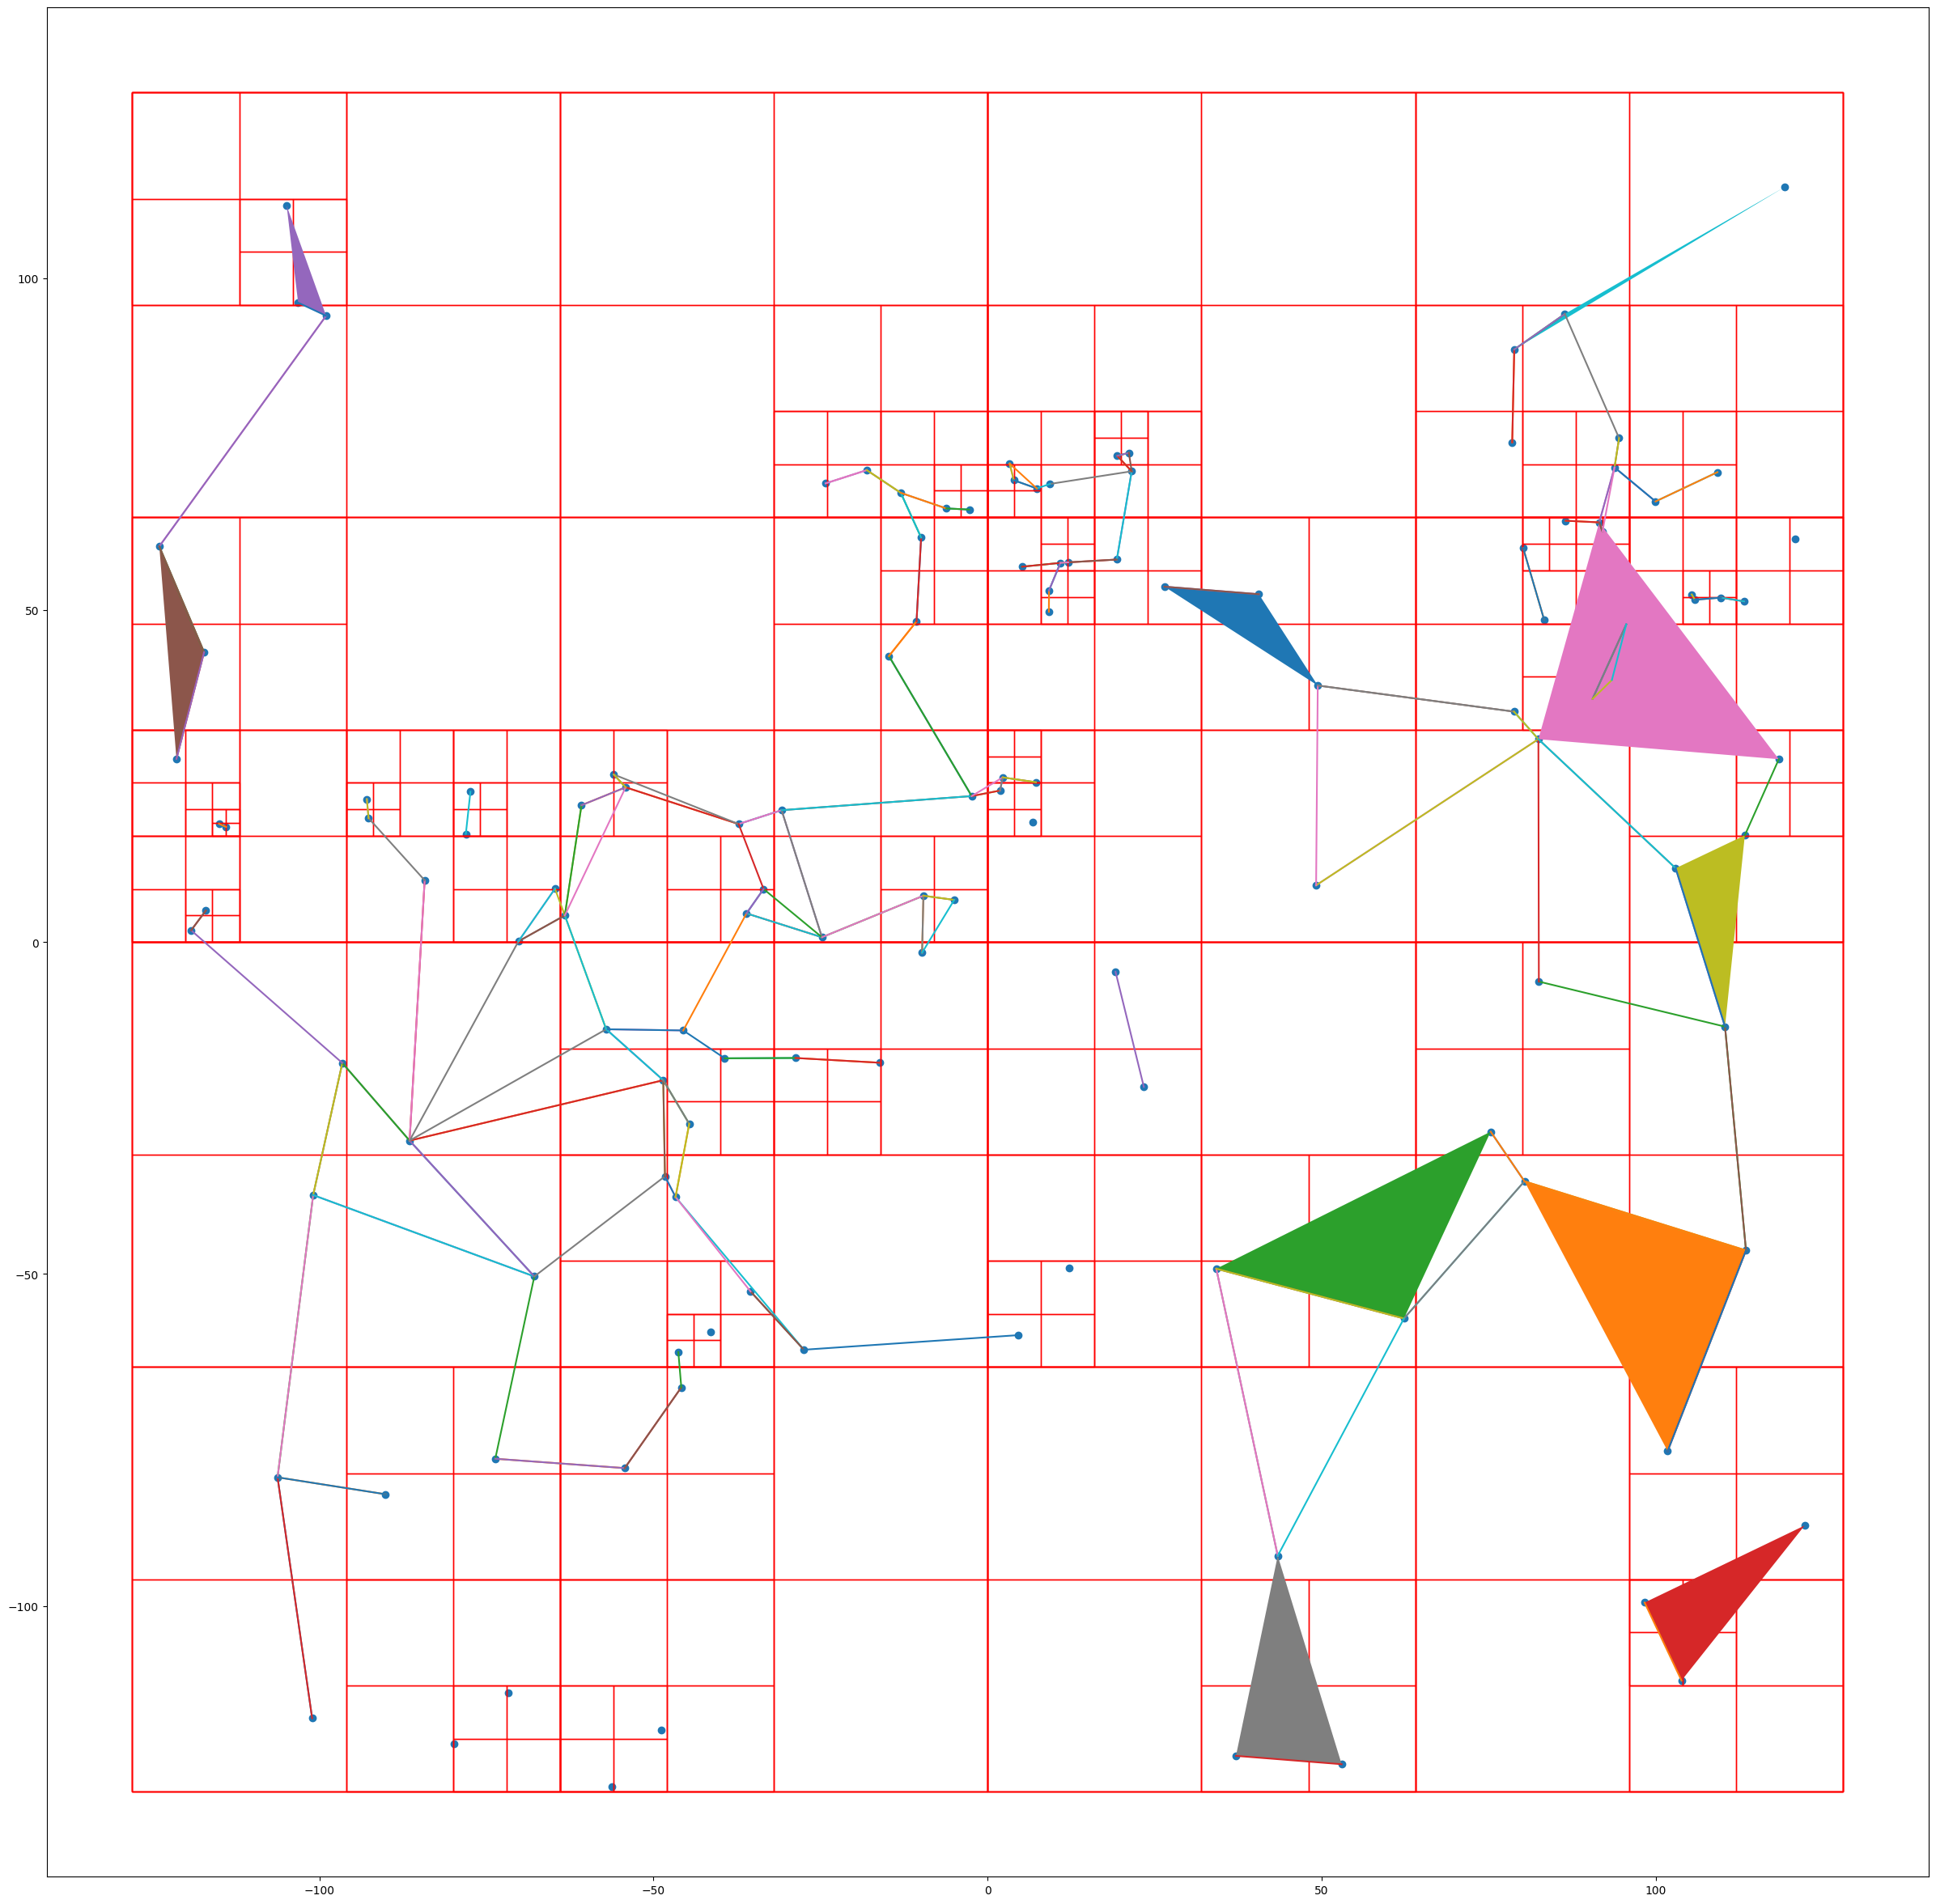

In [26]:
fig, ax = plt.subplots(figsize=(30, 30))

ax.scatter([p[0] for p in point_list], [p[1] for p in point_list])

for box in box_list:
    rect = Rectangle((box[0][0], box[1][0]), abs(box[0][0] - box[0][1]), abs(box[1][0] - box[1][1]), linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

for edge in edge_list:
    point = point_dict[edge[0]]
    point2 = point_dict[edge[1]]

    # draw segment
    plt.plot([point[0], point2[0]], [point[1], point2[1]])

# print(tope_list)

for tope in tope_list:
    
    myColor = generate_random_color()

    print(tope)
    
    x = []; y = []
    for ver in tope:
        # print(line)
        
        x.append(ver[0])
        y.append(ver[1])

    # print(x)
    # print(y)
    
    plt.fill(x, y)
    
plt.show()

In [24]:
tope_list

[[[80.337, -36.0319], [101.768, -76.6829], [113.489, -46.4452]],
 [[34.2208, -49.2043], [62.3039, -56.7028], [75.2861, -28.5574]],
 [[122.259, -87.8966], [103.842, -111.244], [98.3207, -99.4987]],
 [[-103.179, 96.3355], [-104.895, 110.949], [-98.987, 94.3589]],
 [[-117.25, 43.6762], [-123.953, 59.6181], [-121.386, 27.5973]],
 [[82.4233, 30.5727], [118.403, 27.5566], [91.5283, 63.235]],
 [[52.9816, -123.853], [43.4168, -92.4506], [37.1658, -122.595]],
 [[113.317, 16.0919], [102.963, 11.1302], [110.35, -12.7344]],
 [[119.267, 113.745], [78.8119, 89.2856], [86.3726, 94.6301]],
 [[26.4679, 53.5506], [49.4061, 38.6559], [40.592, 52.415]]]